In [73]:
import os

import math
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cwd = os.getcwd()  # Get the current working directory (cwd)
cwd1 = cwd + '\input\data_1.csv'
cwd2 = cwd + '\input\data_2.csv'

In [3]:
def logic(index):
    if index % 1000 == 0:
       return False
    return True

rawdata = pd.read_csv(cwd1, nrows = 50000, skiprows = lambda x: logic(x))
rawdata

,Unnamed: 0,app_id,app_name,review_id,language,review,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,author.num_games_owned,author.playtime_forever
0,999,292030,The Witcher 3: Wild Hunt,84987148,russian,Игра шедевр. Обмазался калом и побежал бить уп...,True,0,0,0.000000,0,False,False,57,458.0
1,1999,292030,The Witcher 3: Wild Hunt,84801196,schinese,当初看玩这游戏打到男爵线\n\n初次见面以及接触的一段时间我觉得男爵无非是个昏庸的小领主，口...,True,3,1,0.526542,0,True,False,132,13629.0
2,2999,292030,The Witcher 3: Wild Hunt,84630318,english,Finishing the game felt like closing a good novel,True,0,0,0.000000,0,True,False,114,11201.0
3,3999,292030,The Witcher 3: Wild Hunt,84471619,english,I love this game and i got the best ending haha,True,1,1,0.523810,0,False,False,33,2191.0
4,4999,292030,The Witcher 3: Wild Hunt,84323221,brazilian,ta bom\n,True,0,0,0.000000,0,False,True,27,844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21742,21743004,546560,Half-Life: Alyx,65678046,english,Wow.,True,1,0,0.523810,0,True,False,350,283.0
21743,21744004,546560,Half-Life: Alyx,65668662,english,Most amazing experience I've ever had in all t...,True,0,0,0.000000,0,True,False,126,1131.0
21744,21745004,546560,Half-Life: Alyx,65661862,czech,"Najlepšia VR singleplayerovka, half life neskl...",True,0,0,0.000000,0,True,False,14,394.0
21745,21746004,546560,Half-Life: Alyx,65656148,german,WOW ein intensives Spielerlebnis!!! muss man e...,True,0,0,0.000000,0,False,False,108,167.0


In [4]:
list(rawdata.columns)

['Unnamed: 0',
 'app_id',
 'app_name',
 'review_id',
 'language',
 'review',
 'recommended',
 'votes_helpful',
 'votes_funny',
 'weighted_vote_score',
 'comment_count',
 'steam_purchase',
 'received_for_free',
 'author.num_games_owned',
 'author.playtime_forever']

In [5]:
rawdata[['steam_purchase', 'received_for_free', 'recommended']] = rawdata[['steam_purchase', 'received_for_free', 'recommended']].astype('int')
rawdata

,Unnamed: 0,app_id,app_name,review_id,language,review,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,author.num_games_owned,author.playtime_forever
0,999,292030,The Witcher 3: Wild Hunt,84987148,russian,Игра шедевр. Обмазался калом и побежал бить уп...,1,0,0,0.000000,0,0,0,57,458.0
1,1999,292030,The Witcher 3: Wild Hunt,84801196,schinese,当初看玩这游戏打到男爵线\n\n初次见面以及接触的一段时间我觉得男爵无非是个昏庸的小领主，口...,1,3,1,0.526542,0,1,0,132,13629.0
2,2999,292030,The Witcher 3: Wild Hunt,84630318,english,Finishing the game felt like closing a good novel,1,0,0,0.000000,0,1,0,114,11201.0
3,3999,292030,The Witcher 3: Wild Hunt,84471619,english,I love this game and i got the best ending haha,1,1,1,0.523810,0,0,0,33,2191.0
4,4999,292030,The Witcher 3: Wild Hunt,84323221,brazilian,ta bom\n,1,0,0,0.000000,0,0,1,27,844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21742,21743004,546560,Half-Life: Alyx,65678046,english,Wow.,1,1,0,0.523810,0,1,0,350,283.0
21743,21744004,546560,Half-Life: Alyx,65668662,english,Most amazing experience I've ever had in all t...,1,0,0,0.000000,0,1,0,126,1131.0
21744,21745004,546560,Half-Life: Alyx,65661862,czech,"Najlepšia VR singleplayerovka, half life neskl...",1,0,0,0.000000,0,1,0,14,394.0
21745,21746004,546560,Half-Life: Alyx,65656148,german,WOW ein intensives Spielerlebnis!!! muss man e...,1,0,0,0.000000,0,0,0,108,167.0


In [115]:
columns = [
 'recommended',
 'votes_helpful',
 'votes_funny',
 'weighted_vote_score',
 'comment_count',
 'steam_purchase',
 'received_for_free',
 'author.num_games_owned',
 'author.playtime_forever']

In [134]:
rawdata

,Unnamed: 0,app_id,app_name,review_id,language,review,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,author.num_games_owned,author.playtime_forever
0,999,292030,The Witcher 3: Wild Hunt,84987148,russian,Игра шедевр. Обмазался калом и побежал бить уп...,1,0,0,0.000000,0,0,0,57,458.0
1,1999,292030,The Witcher 3: Wild Hunt,84801196,schinese,当初看玩这游戏打到男爵线\n\n初次见面以及接触的一段时间我觉得男爵无非是个昏庸的小领主，口...,1,3,1,0.526542,0,1,0,132,13629.0
2,2999,292030,The Witcher 3: Wild Hunt,84630318,english,Finishing the game felt like closing a good novel,1,0,0,0.000000,0,1,0,114,11201.0
3,3999,292030,The Witcher 3: Wild Hunt,84471619,english,I love this game and i got the best ending haha,1,1,1,0.523810,0,0,0,33,2191.0
4,4999,292030,The Witcher 3: Wild Hunt,84323221,brazilian,ta bom\n,1,0,0,0.000000,0,0,1,27,844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21742,21743004,546560,Half-Life: Alyx,65678046,english,Wow.,1,1,0,0.523810,0,1,0,350,283.0
21743,21744004,546560,Half-Life: Alyx,65668662,english,Most amazing experience I've ever had in all t...,1,0,0,0.000000,0,1,0,126,1131.0
21744,21745004,546560,Half-Life: Alyx,65661862,czech,"Najlepšia VR singleplayerovka, half life neskl...",1,0,0,0.000000,0,1,0,14,394.0
21745,21746004,546560,Half-Life: Alyx,65656148,german,WOW ein intensives Spielerlebnis!!! muss man e...,1,0,0,0.000000,0,0,0,108,167.0


C:\Users\AH_lj\AppData\Local\Temp\ipykernel_22196\512108289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr["votes_funny"] = df_corr.apply(lambda row: 0 if row["votes_funny"] == 0 else 1, axis=1)
C:\Users\AH_lj\AppData\Local\Temp\ipykernel_22196\512108289.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr["votes_helpful"] = df_corr.apply(lambda row: 0 if row["votes_helpful"] == 0 else 1, axis=1)


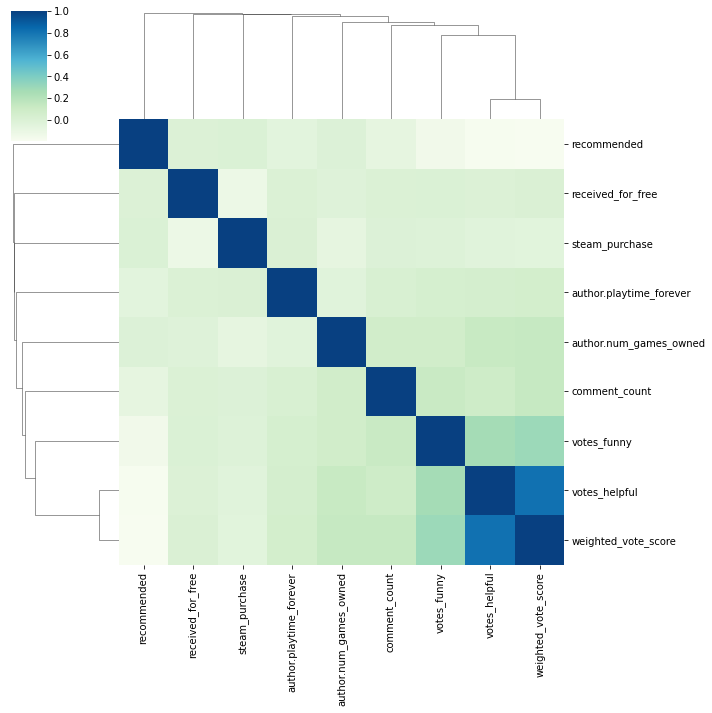

In [121]:
df_corr = rawdata[columns]
df_corr["votes_funny"] = df_corr.apply(lambda row: 0 if row["votes_funny"] == 0 else 1, axis=1)
df_corr["votes_helpful"] = df_corr.apply(lambda row: 0 if row["votes_helpful"] == 0 else 1, axis=1)

df_corr

sns.clustermap(df_corr.corr(), method = "single", cmap='GnBu')

## Word Cloud

Select top words among negative reviews and postivie reviews.

In [7]:
# removes a list of words (ie. stopwords) from a tokenized list.
def removeWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if token not in listOfWords]

# applies stemming to a list of tokenized words
def applyStemming(listOfTokens, stemmer):
    return [stemmer.stem(token) for token in listOfTokens]

# removes any words composed of less than 2 or more than 21 letters
def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 21:
            twoLetterWord.append(token)
    return twoLetterWord

In [33]:
# New imports 
import re
import nltk.corpus
import snowballstemmer
from nltk.stem import WordNetLemmatizer

from unidecode import unidecode
from nltk.tokenize import word_tokenize
from nltk import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

include_title = False
english_only = True


In [9]:
df_target = rawdata[['language','review', 'recommended']]

if english_only:
    df_target = df_target[df_target['language'] == 'english']

df_target

,language,review,recommended
2,english,Finishing the game felt like closing a good novel,1
3,english,I love this game and i got the best ending haha,1
7,english,good game.,1
8,english,amazing game all round,1
9,english,.,1
...,...,...,...
21740,english,This is the best VR experience I have had with...,1
21741,english,"valve absolutely nails it once again, after so...",1
21742,english,Wow.,1
21743,english,Most amazing experience I've ever had in all t...,1


In [50]:

# some heavy preprocess
i = 0 

def process_row(row):
    global i 
    global include_title
    print("Tfidf Progress: "+str("{:.5f}".format(i/(len(df_target)-1) *100)) + "%",end="\r")
    i += 1
    
    language = row['language']
    reuslt = None
    if include_title:
        result = (str(row['review']) + " " + str(row['app_name'])).replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
    else:
        result = (str(row['review'])).replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
    
    result = result.replace(',', '')          # Removes commas
    result = result.rstrip('\n')              # Removes line breaks
    result = result.casefold()                # Makes all letters lowercase

    result = re.sub('\W_',' ', result)        # removes specials characters and leaves only words
    result = re.sub("\S*\d\S*"," ", result)   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
    result = re.sub("\S*@\S*\s?"," ", result) # removes emails and mentions (words with @)
    result = re.sub(r'http\S+', '', result)   # removes URLs with http
    result = re.sub(r'www\S+', '', result)    # removes URLs with www
    
    result = re.sub(r"\s+(.)\1+\b", "",result)               # remove spammed chars
    result = ''.join([i for i in result if not i.isdigit()]) # remove numbers
    result = re.sub(r'[^\w\s]','',result)                    # remove punctuation
   
    listOfTokens = word_tokenize(result)
    twoLetterWord = twoLetters(listOfTokens)

    try: 
        # Not all languages are supported 
        # We remove stopwords and stem only with supported languages
        stopwords = nltk.corpus.stopwords.words(language)
        stopwords.append("game")
        
        param_stemmer = SnowballStemmer(language)
        lemmatizer = WordNetLemmatizer()
        listOfTokens = [lemmatizer.lemmatize(token) for token in listOfTokens]
        listOfTokens = removeWords(listOfTokens, stopwords)

    finally:
        # Output the tokens
        listOfTokens = list(filter(lambda item: len(item) < 25,listOfTokens))   # other spam filter
        listOfTokens = removeWords(listOfTokens, ["game","gam","igr","juego","you","jogao", "im", "ha"]) # some game translations (en,en,ru,sp,ch,pt)
        
        result   = " ".join(listOfTokens)
        result = unidecode(result)
        result = re.sub(r'[^\x00-\x7F]+','', result)    # remove non ascii
        return result

In [51]:
df_target['tokens'] = df_target.apply(lambda row: process_row(row), axis=1)

In [129]:
df_recommend = df_target[df_target['recommended'] == 1]
df_not_recommend = df_target[df_target['recommended'] == 0]

df_not_recommend

,language,review,recommended,tokens
18,english,Horrible combat. Unplayable if quest markers a...,0,horrible combat unplayable quest marker breadc...
137,english,"There is a bug, way too dark and way too much ...",0,bug way dark way much rain fix available terri...
237,english,Despite its amazing visuals and attention to d...,0,despite amazing visuals attention detail still...
313,english,"This could have been a great game, but I am ha...",0,could great hating enjoying control clunky jum...
320,english,Ive played it a while and all I can say is 'i ...,0,ive played say guess recommending ive ctrlaltd...
...,...,...,...,...
21612,english,"The gameplay and such is great, but it's quite...",0,gameplay great quite literally unplayable run ...
21625,english,I'm sure this game the potential to be great -...,0,sure potential great lot people enjoying devel...
21656,english,huge fan of the dead rising series. i wanted t...,0,huge fan dead rising series wanted love beyond...
21681,english,Game is dead. Don't waste your money.,0,dead dont waste money


In [100]:
from wordcloud import WordCloud
from PIL import Image
from sklearn import model_selection, feature_extraction

In [130]:
cntvect = feature_extraction.text.CountVectorizer(stop_words='english', max_features=1000)
cntvect_fit = cntvect.fit_transform(df_recommend['tokens'].to_numpy())
freq = dict(zip(cntvect.get_feature_names(),cntvect_fit.toarray().sum(axis=0)))

print(freq)

{'ability': 73, 'able': 115, 'abouthours': 37, 'absolute': 35, 'absolutely': 143, 'access': 93, 'achievement': 48, 'acting': 40, 'action': 113, 'active': 38, 'actual': 43, 'actually': 179, 'add': 159, 'added': 71, 'addicted': 33, 'addicting': 70, 'addictive': 72, 'adding': 31, 'addition': 39, 'adventure': 47, 'age': 49, 'ago': 60, 'ai': 104, 'alien': 29, 'allow': 28, 'allows': 32, 'alot': 80, 'alpha': 27, 'alright': 34, 'amazing': 569, 'ammo': 23, 'animal': 31, 'animation': 48, 'annoying': 68, 'anymore': 27, 'appreciate': 29, 'area': 64, 'arent': 61, 'ark': 32, 'armor': 36, 'army': 39, 'art': 92, 'ask': 34, 'aspect': 75, 'atmosphere': 61, 'attack': 49, 'attention': 47, 'audio': 25, 'available': 50, 'average': 43, 'award': 22, 'away': 97, 'awesome': 309, 'awful': 27, 'awsome': 25, 'bad': 237, 'balance': 37, 'balanced': 37, 'ball': 28, 'bar': 23, 'barely': 26, 'base': 126, 'based': 86, 'basic': 49, 'basically': 55, 'battle': 91, 'beat': 77, 'beautiful': 157, 'begin': 24, 'beginning': 32,

c:\Users\AH_lj\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


c:\Users\AH_lj\Documents\2023\3.31\input\upvote.png


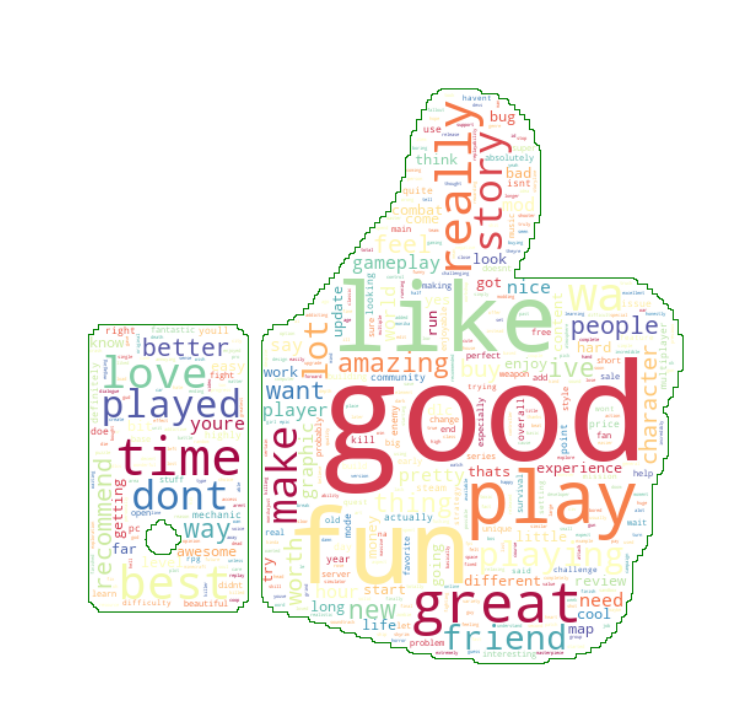

In [131]:
path = cwd + r'\input\upvote.png'
print(path)
c_mask = np.array(Image.open(path))

wc = WordCloud(background_color="white", mask=c_mask, mode="RGB",
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1, contour_color="green",colormap="Spectral")
wc.generate_from_frequencies(freq)
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation="bilinear")
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

In [132]:
cntvect = feature_extraction.text.CountVectorizer(stop_words='english', max_features=1000)
cntvect_fit = cntvect.fit_transform(df_not_recommend['tokens'].to_numpy())
freq = dict(zip(cntvect.get_feature_names(),cntvect_fit.toarray().sum(axis=0)))

print(freq)

{'ability': 21, 'able': 41, 'aboutminutes': 6, 'absolute': 10, 'absolutely': 21, 'access': 33, 'account': 12, 'achievement': 9, 'acting': 9, 'action': 18, 'actor': 6, 'actual': 14, 'actually': 52, 'add': 32, 'added': 9, 'addition': 6, 'additional': 6, 'address': 8, 'admit': 6, 'advantage': 6, 'agame': 6, 'age': 10, 'ago': 18, 'ai': 36, 'aim': 12, 'allow': 7, 'allowed': 6, 'allows': 8, 'alot': 16, 'alpha': 9, 'alright': 10, 'amazing': 27, 'andor': 7, 'animation': 10, 'annoying': 28, 'anymore': 34, 'apparently': 8, 'area': 33, 'arent': 16, 'ark': 39, 'armor': 18, 'army': 14, 'art': 11, 'aside': 6, 'ask': 11, 'asking': 6, 'aspect': 22, 'attack': 32, 'attempt': 8, 'attention': 10, 'audio': 8, 'auto': 8, 'available': 10, 'average': 9, 'avoid': 20, 'away': 34, 'awesome': 11, 'awful': 13, 'background': 10, 'bad': 129, 'bag': 9, 'balance': 9, 'balanced': 9, 'ban': 17, 'bank': 6, 'banned': 14, 'barely': 6, 'barrel': 7, 'base': 40, 'based': 24, 'basic': 14, 'basically': 21, 'battle': 25, 'beat':

c:\Users\AH_lj\Documents\2023\3.31\input\downvote.png


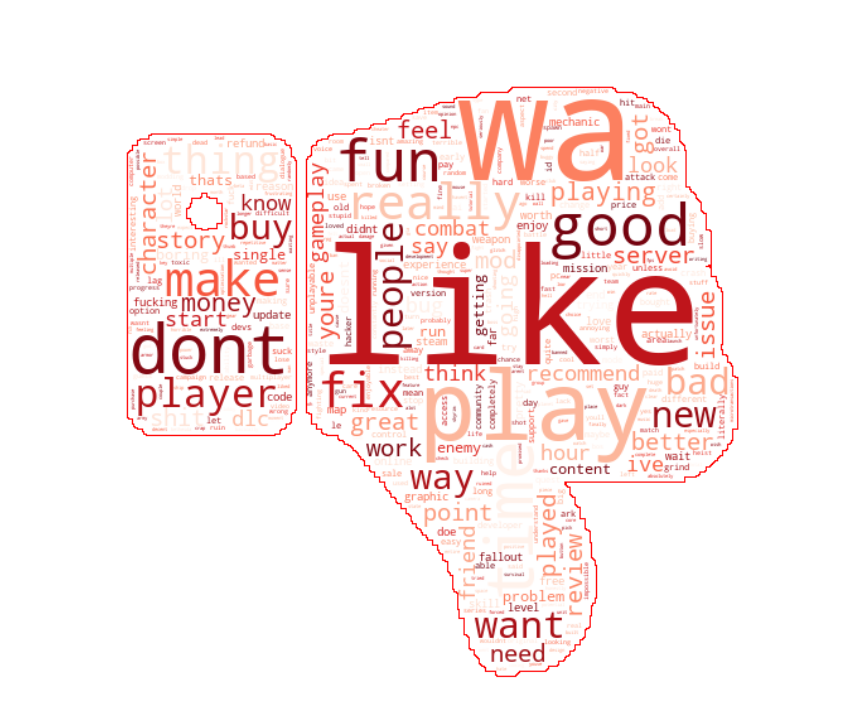

In [104]:
path = cwd + r'\input\downvote.png'
print(path)
c_mask = np.array(Image.open(path))

wc = WordCloud(background_color="white", mask=c_mask, mode="RGB",
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1, contour_color="red",colormap="Reds")
wc.generate_from_frequencies(freq)
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation="bilinear")
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()